In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials 
# Spotify API credentials
client_id = "91924ddd17664918b13c9a03215e995b"
client_secret = "dcbdd3d0af7d47b68db10e4a438e0832"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 

In [2]:
# Define the artist name(s) you want to search for
name = ["S. P. Balasubrahmanyam"]
# Search for the artist
artist = sp.search(name) 

In [3]:
# Get the URI of the first artist found
artists_uris = artist['tracks']['items'][0]['artists'][0]['uri']

# Get the albums of the artist
artist_albums = sp.artist_albums(artists_uris, album_type='album')

# Initialize empty lists to store album names and URIs
artist_album_names = []
artist_album_uris = []

# Extract album names and URIs
for i in range(len(artist_albums['items'])):
    artist_album_names.append(artist_albums['items'][i]['name'])
    artist_album_uris.append(artist_albums['items'][i]['uri'])

In [4]:
# Function to retrieve songs from an album URI
def album_songs(uri):
    album = uri 
    spotify_albums[album] = {}
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] 
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    #pull data on album tracks
    tracks = sp.album_tracks(album) 
    for n in range(len(tracks['items'])): 
        spotify_albums[album]['album'].append(artist_album_names[album_count]) 
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [5]:
# Dictionary to store album data
spotify_albums = {}
album_count = 0

# Loop through each album URI and retrieve songs
for i in artist_album_uris: #each album
    album_songs(i)
    print(str(artist_album_names[album_count]) + " album songs has been added to spotify_albums dictionary")
    album_count+=1

Balakrishna Hit Songs album songs has been added to spotify_albums dictionary
Chandrabose Golden Memories album songs has been added to spotify_albums dictionary
The Essence of Bhagwad Gita album songs has been added to spotify_albums dictionary
Maa Baba album songs has been added to spotify_albums dictionary
Banni Kannada Naadige album songs has been added to spotify_albums dictionary
Super Ton for Tms album songs has been added to spotify_albums dictionary
Spb - The Hard Hitter album songs has been added to spotify_albums dictionary
S P Balasubramanyam Kannada Ayyappa album songs has been added to spotify_albums dictionary
S P Balasubramanyam Telugu Ayyappa album songs has been added to spotify_albums dictionary
Top - 20 S.P.B Super Hit Songs album songs has been added to spotify_albums dictionary
Top 100 Songs - SPB album songs has been added to spotify_albums dictionary
Hum Aapke Hain Koun - Jhankar Beats album songs has been added to spotify_albums dictionary
Swara Sangeethotsava 

In [7]:
# Function to retrieve audio features for tracks in an album
def audio_features(album):
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    
    track_count = 0
    for track in spotify_albums[album]['uri']:
        features = sp.audio_features(track)
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [8]:
# Import necessary libraries
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 13.058062076568604 seconds
10 playlists completed
Loop #: 10
Elapsed Time: 27.855156421661377 seconds
15 playlists completed
Loop #: 15
Elapsed Time: 48.72675347328186 seconds
20 playlists completed
Loop #: 20
Elapsed Time: 59.184553146362305 seconds


In [9]:
# Dictionary to store data for creating a DataFrame
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []

# Populate the DataFrame dictionary
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])

# Calculate the length of the DataFrame
len(dic_df['album'])

244

In [10]:
# Import pandas library and create a DataFrame
import pandas as pd
dataframe = pd.DataFrame.from_dict(dic_df)
dataframe

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,Balakrishna Hit Songs,1,0tcKNQKbX2rUzDVusIXZ1N,Paalakolla Papa,spotify:track:0tcKNQKbX2rUzDVusIXZ1N,0.786,0.486,0.598,0.000000,0.321,-5.024,0.0455,92.491,0.799,33
1,Balakrishna Hit Songs,2,6V6ac50KdPGOyCroTUd631,Oho Bhama,spotify:track:6V6ac50KdPGOyCroTUd631,0.612,0.739,0.929,0.000003,0.263,-3.143,0.1300,90.974,0.898,25
2,Balakrishna Hit Songs,3,5wBCqWnJS9eowHMFTd0rmu,Srirasthu Shubhamasthu,spotify:track:5wBCqWnJS9eowHMFTd0rmu,0.651,0.502,0.668,0.000000,0.345,-3.633,0.0314,97.060,0.472,18
3,Balakrishna Hit Songs,4,0pVE2dUVtBSae6nhR8T7Bv,Okkasaari Okkasaari,spotify:track:0pVE2dUVtBSae6nhR8T7Bv,0.526,0.638,0.677,0.000000,0.165,-4.615,0.0324,132.843,0.606,22
4,Balakrishna Hit Songs,5,53bJ3dcdhXthwPPeghk0DH,Edu Ela Vesina,spotify:track:53bJ3dcdhXthwPPeghk0DH,0.561,0.704,0.783,0.000000,0.175,-4.800,0.0677,80.521,0.865,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,Bhakthi Loka,4,6VtFEpKh0r8FuLqqradtsr,Nene Manave Sri Ramana Namava,spotify:track:6VtFEpKh0r8FuLqqradtsr,0.912,0.647,0.644,0.000066,0.406,-6.679,0.1250,96.778,0.728,0
240,Bhakthi Loka,5,0gwbNNpxiyQ6wZtWg96GDE,Prabhuve Gururaghavendrane,spotify:track:0gwbNNpxiyQ6wZtWg96GDE,0.886,0.680,0.522,0.002510,0.166,-9.921,0.0554,81.169,0.741,0
241,Bhakthi Loka,6,5MZ8UOvvxWUDmxtHIIcA6k,Enu Dhanyano Hanuma,spotify:track:5MZ8UOvvxWUDmxtHIIcA6k,0.740,0.546,0.509,0.000000,0.260,-9.174,0.0801,179.250,0.739,0
242,Bhakthi Loka,7,2gp7xaHTTWR3unpx7d7Tda,Sri Sathyanarayana,spotify:track:2gp7xaHTTWR3unpx7d7Tda,0.734,0.511,0.513,0.000004,0.283,-9.028,0.1690,107.882,0.672,0


In [11]:
# Summary statistics
print(dataframe.describe())

# Data info
print(dataframe.info())


       track_number  acousticness  danceability      energy  instrumentalness  \
count    244.000000    244.000000    244.000000  244.000000        244.000000   
mean       8.942623      0.553814      0.621594    0.570340          0.037994   
std        7.720209      0.283999      0.137119    0.192442          0.142985   
min        1.000000      0.004990      0.160000    0.088000          0.000000   
25%        4.000000      0.316000      0.536750    0.425500          0.000000   
50%        7.000000      0.576500      0.640500    0.553500          0.000003   
75%       11.000000      0.808500      0.714500    0.719500          0.000070   
max       37.000000      0.991000      0.910000    0.983000          0.895000   

         liveness    loudness  speechiness       tempo     valence  popularity  
count  244.000000  244.000000   244.000000  244.000000  244.000000  244.000000  
mean     0.226082   -8.714943     0.081585  117.473971    0.651844    3.688525  
std      0.149281    2.7881

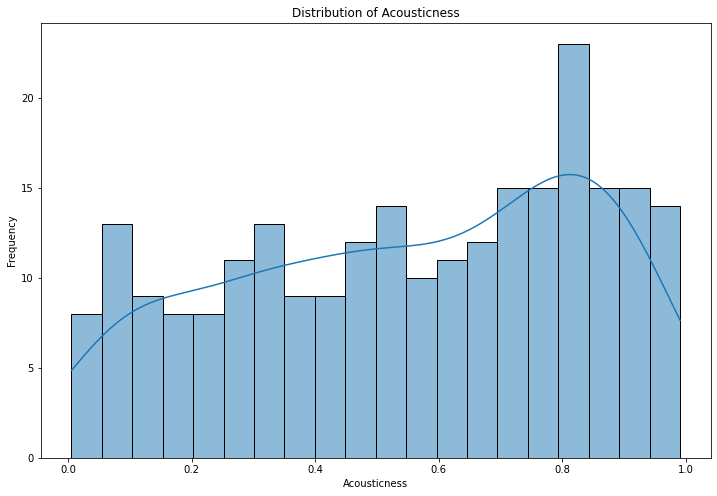

In [12]:
# Import matplotlib and seaborn for data visualization

import matplotlib.pyplot as plt
import seaborn as sns
# Plot a histogram of the 'acousticness' feature
plt.figure(figsize=(12, 8))
sns.histplot(data=dataframe, x='acousticness', bins=20, kde=True)
plt.title('Distribution of Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Frequency')
plt.show()

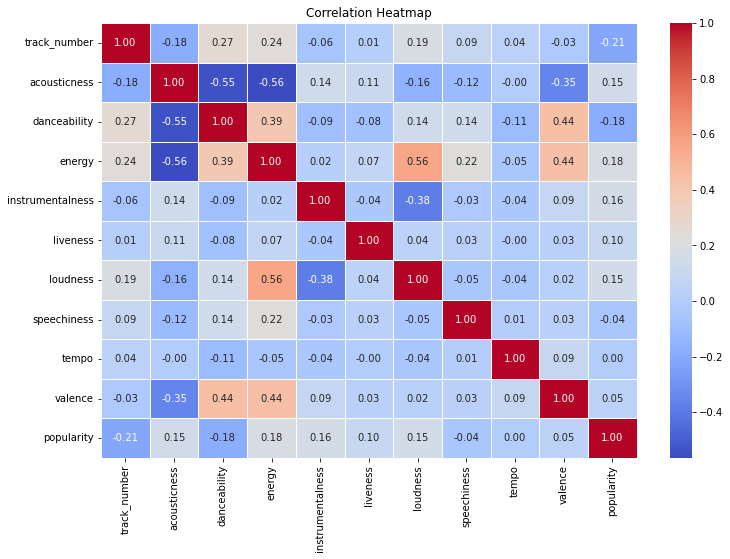

In [13]:
# Create a correlation matrix and plot a heatmap
correlation_matrix = dataframe.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

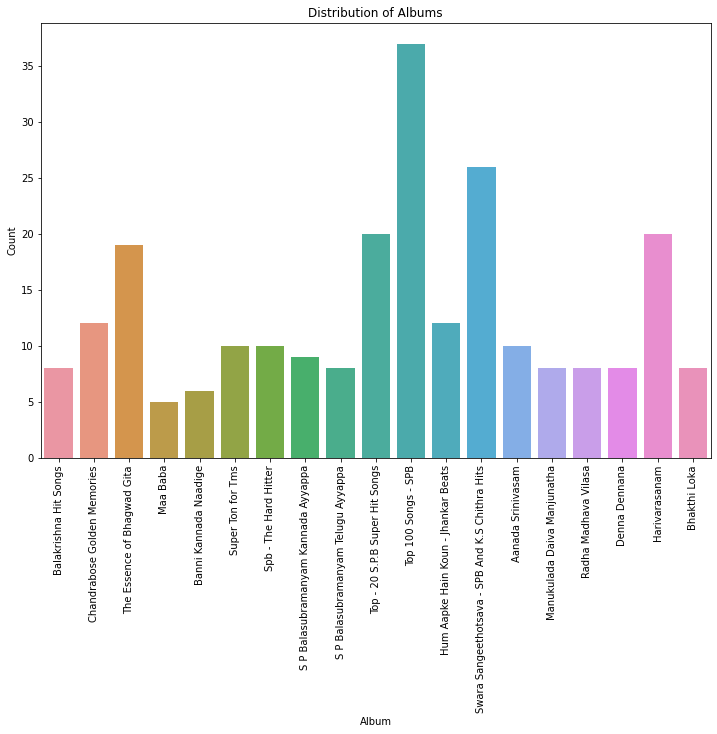

In [14]:
# Plot a countplot for the 'album' feature
plt.figure(figsize=(12, 8))
sns.countplot(data=dataframe, x='album')
plt.title('Distribution of Albums')
plt.xlabel('Album')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

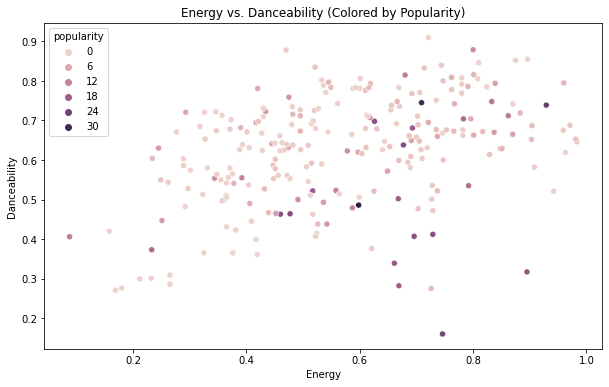

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataframe, x='energy', y='danceability', hue='popularity')
plt.title('Energy vs. Danceability (Colored by Popularity)')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.show()

In [16]:
correlation_matrix = dataframe.corr()
popularity_correlations = correlation_matrix['popularity'].sort_values(ascending=False)
print(popularity_correlations)

popularity          1.000000
energy              0.183239
instrumentalness    0.157466
loudness            0.154648
acousticness        0.146095
liveness            0.097427
valence             0.045672
tempo               0.004005
speechiness        -0.044894
danceability       -0.181300
track_number       -0.213245
Name: popularity, dtype: float64


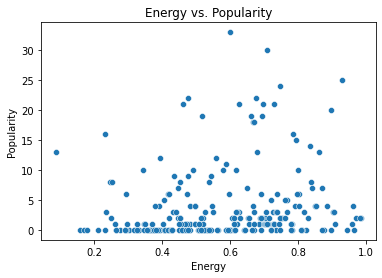

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=dataframe, x='energy', y='popularity')
plt.title('Energy vs. Popularity')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.show()

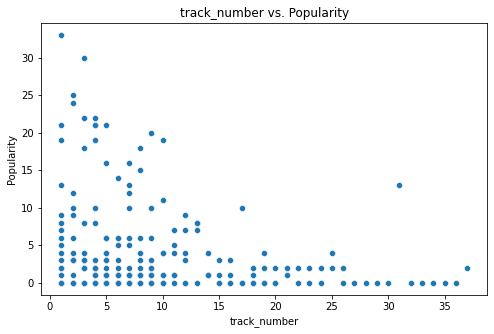

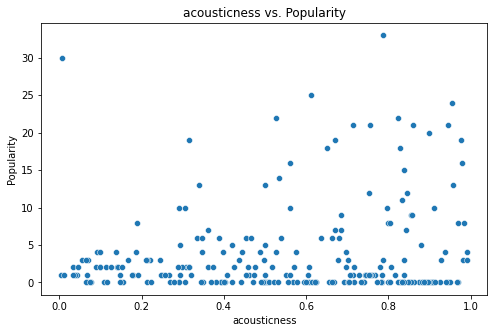

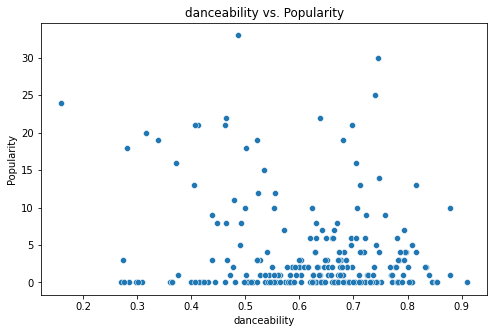

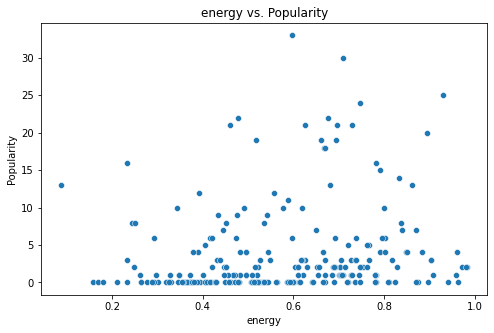

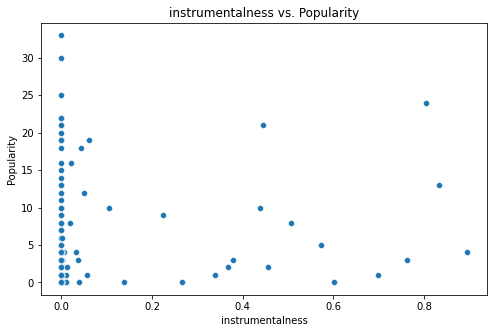

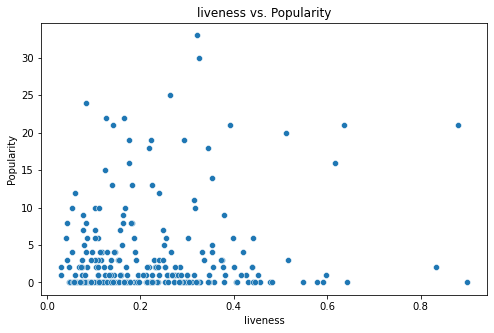

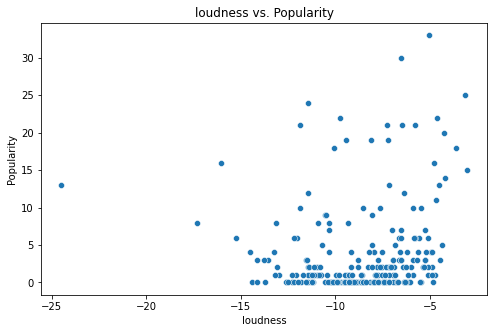

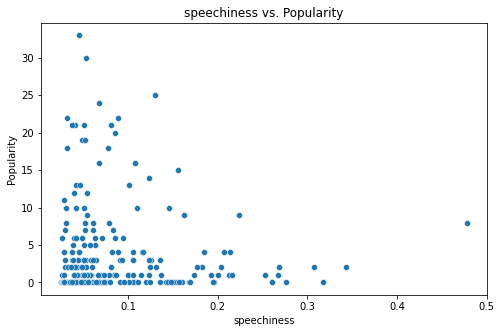

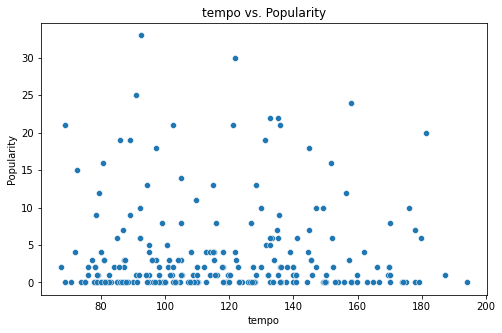

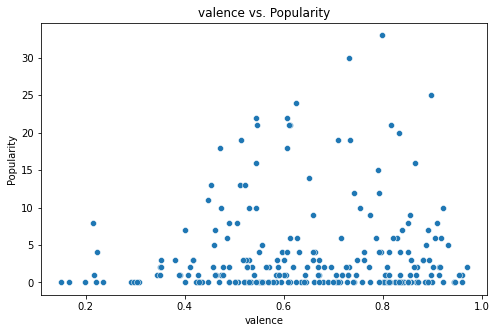

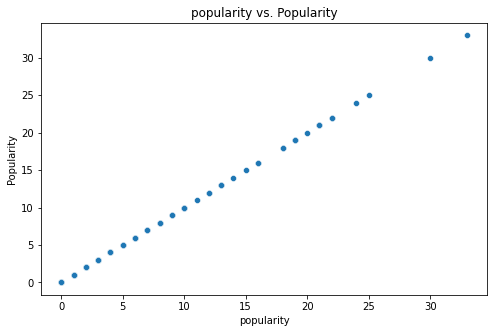

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the numeric columns (excluding 'popularity' which is the target)
numeric_features = dataframe.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create scatter plots for all numeric features vs. 'popularity'
for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=dataframe, x=feature, y='popularity')
    plt.title(f'{feature} vs. Popularity')
    plt.xlabel(feature)
    plt.ylabel('Popularity')
    plt.show()



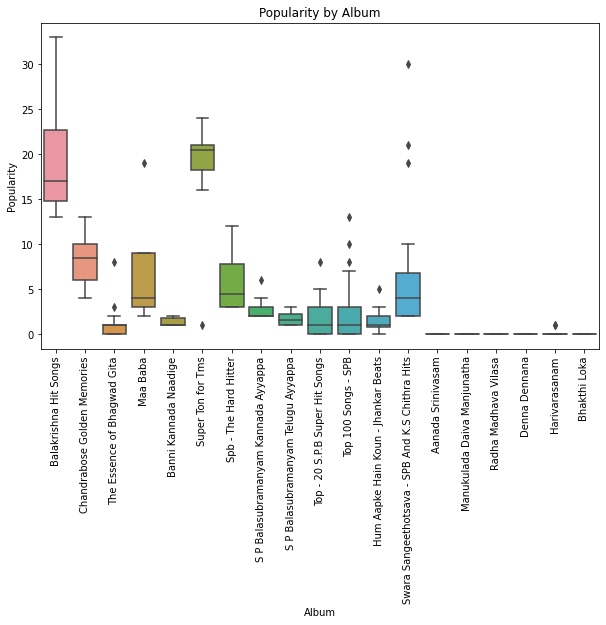

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataframe, x='album', y='popularity')
plt.title('Popularity by Album')
plt.xlabel('Album')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()

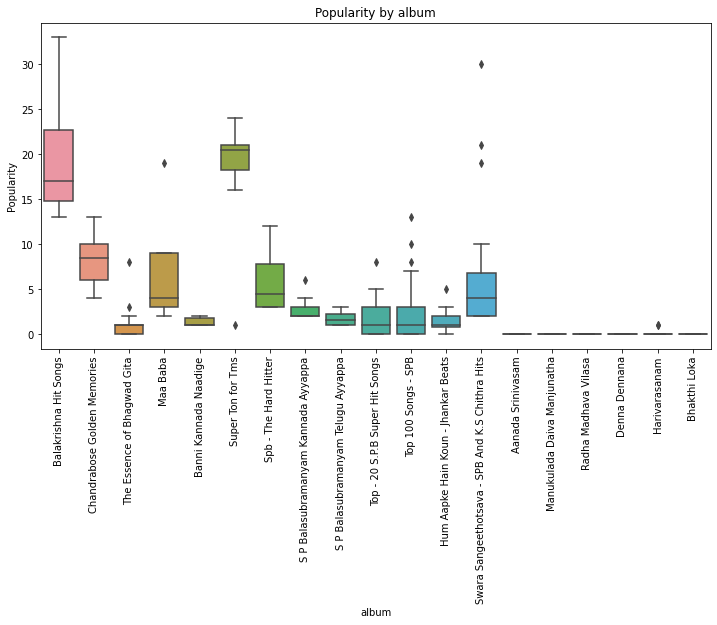

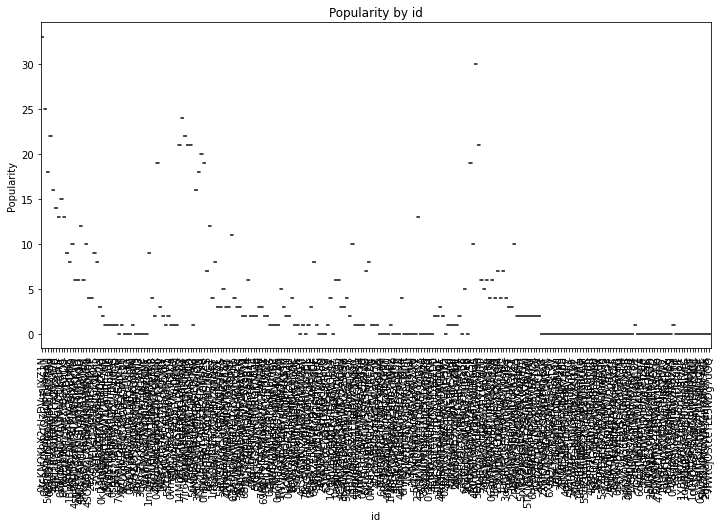

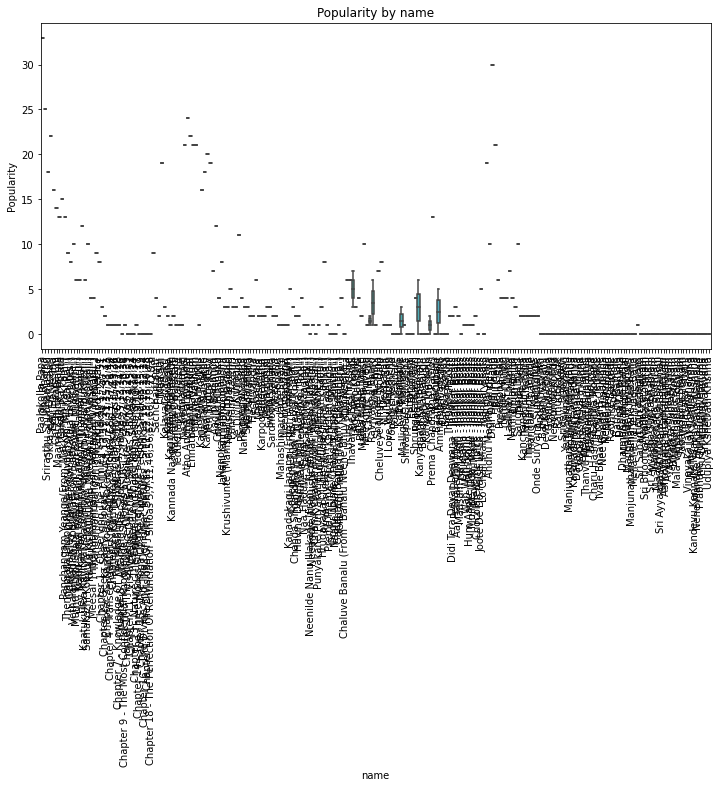

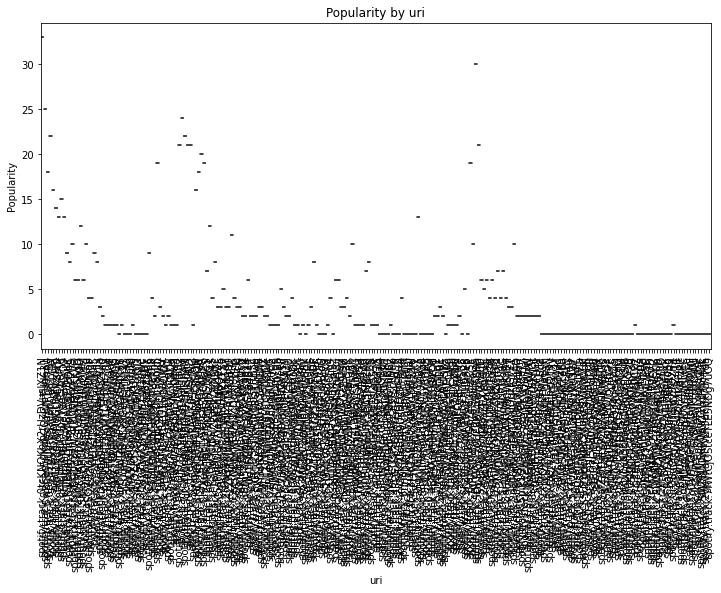

In [20]:
# Create box plots for all categorical features vs. 'popularity'
categorical_features = dataframe.select_dtypes(include=['object']).columns.tolist()
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=dataframe, x=feature, y='popularity')
    plt.title(f'Popularity by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Popularity')
    plt.xticks(rotation=90)
    plt.show()

ANOVA F-Statistic: 26.137517173144616
ANOVA p-value: 2.884054966870842e-45


In [22]:
from sklearn.linear_model import LinearRegression

# Example: Fit a simple linear regression model
X = dataframe[['energy', 'danceability', 'tempo']]
y = dataframe['popularity']

model = LinearRegression()
model.fit(X, y)

# Coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print('Coefficients:', coefficients)
print('Intercept:', intercept)

Coefficients: [ 9.37210116e+00 -1.31621496e+01 -2.92949754e-03]
Intercept: 6.868895276397633
